# <CENTER><U> 1. IMPORTING BASIC NECESSARY PACKAGES</U></CENTER>

In [1]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from __future__ import division
from sklearn.cluster import KMeans
# Implement learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn import model_selection as cross_validation
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import xgboost as xgb
plt.style.use("ggplot")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xlrd
import lifetimes
import datetime
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
from datetime import datetime, timedelta,date

In [4]:
##Dataset Import:
from sklearn import datasets
from sklearn.datasets import load_iris

## Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

##Importing ensemble and ML Models:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


import pandas_profiling
##Importing sklearn model selection and metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

## <CENTER><U> 2. READING INPUT DATA </CENTER></U>`

In [5]:
fraud = pd.read_csv('Data_Processing/FraudData_ValidationSet.csv')
fraud.drop('Unnamed: 0',axis=1,inplace=True)
fraud.count()

amt                        300000
zip                        300000
lat                        300000
long                       300000
city_pop                   300000
merch_lat                  300000
merch_long                 300000
age                        300000
hour                       300000
day                        300000
month                      300000
is_fraud                   300000
category_food_dining       300000
category_gas_transport     300000
category_grocery_net       300000
category_grocery_pos       300000
category_health_fitness    300000
category_home              300000
category_kids_pets         300000
category_misc_net          300000
category_misc_pos          300000
category_personal_care     300000
category_shopping_net      300000
category_shopping_pos      300000
category_travel            300000
dtype: int64

# <B><U><CENTER> PART 1: SUPERVISED EXECUTION

## <CENTER><U> 7. SPLITTING TEST AND TRAIN DATA</CENTER></U>

In [6]:
fraud.head(5)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,167.42,93529,37.7773,-119.0825,633,38.492626,-118.677235,95,8,2,...,1,0,0,0,0,0,0,0,0,0
1,46.91,39769,33.3570,-89.0473,1923,33.193352,-90.017058,62,11,5,...,0,0,0,0,0,0,0,0,0,0
2,8.46,10504,41.1360,-73.7009,7987,41.493080,-74.290518,58,10,4,...,0,0,0,0,0,0,0,0,1,0
3,112.71,63665,37.3272,-91.0243,241,36.342555,-91.407343,48,18,4,...,0,0,1,0,0,0,0,0,0,0
4,56.41,64686,39.7417,-93.6289,271,39.435902,-93.064931,50,22,6,...,0,0,1,0,0,0,0,0,0,0


In [7]:
fraud.shape

(300000, 25)

In [8]:
#create X and y, X will be feature set and y is the label - LTV
X = fraud.drop(['is_fraud'],axis=1)
y = fraud['is_fraud']

In [9]:
fraud_part2=fraud

# <B><U><CENTER> PART 2: SEMI SUPERVISED EXECUTION

## <B><U><CENTER> 10. PRINCIPLE COMPONENT ANALYSIS

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as RandomizedPCA

def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (20,20))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights",fontsize=25)
    ax.set_xticklabels(dimensions, rotation=0,fontsize=25)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [11]:
X.dtypes

amt                        float64
zip                          int64
lat                        float64
long                       float64
city_pop                     int64
merch_lat                  float64
merch_long                 float64
age                          int64
hour                         int64
day                          int64
month                        int64
category_food_dining         int64
category_gas_transport       int64
category_grocery_net         int64
category_grocery_pos         int64
category_health_fitness      int64
category_home                int64
category_kids_pets           int64
category_misc_net            int64
category_misc_pos            int64
category_personal_care       int64
category_shopping_net        int64
category_shopping_pos        int64
category_travel              int64
dtype: object

In [12]:
y.dtypes

dtype('int64')

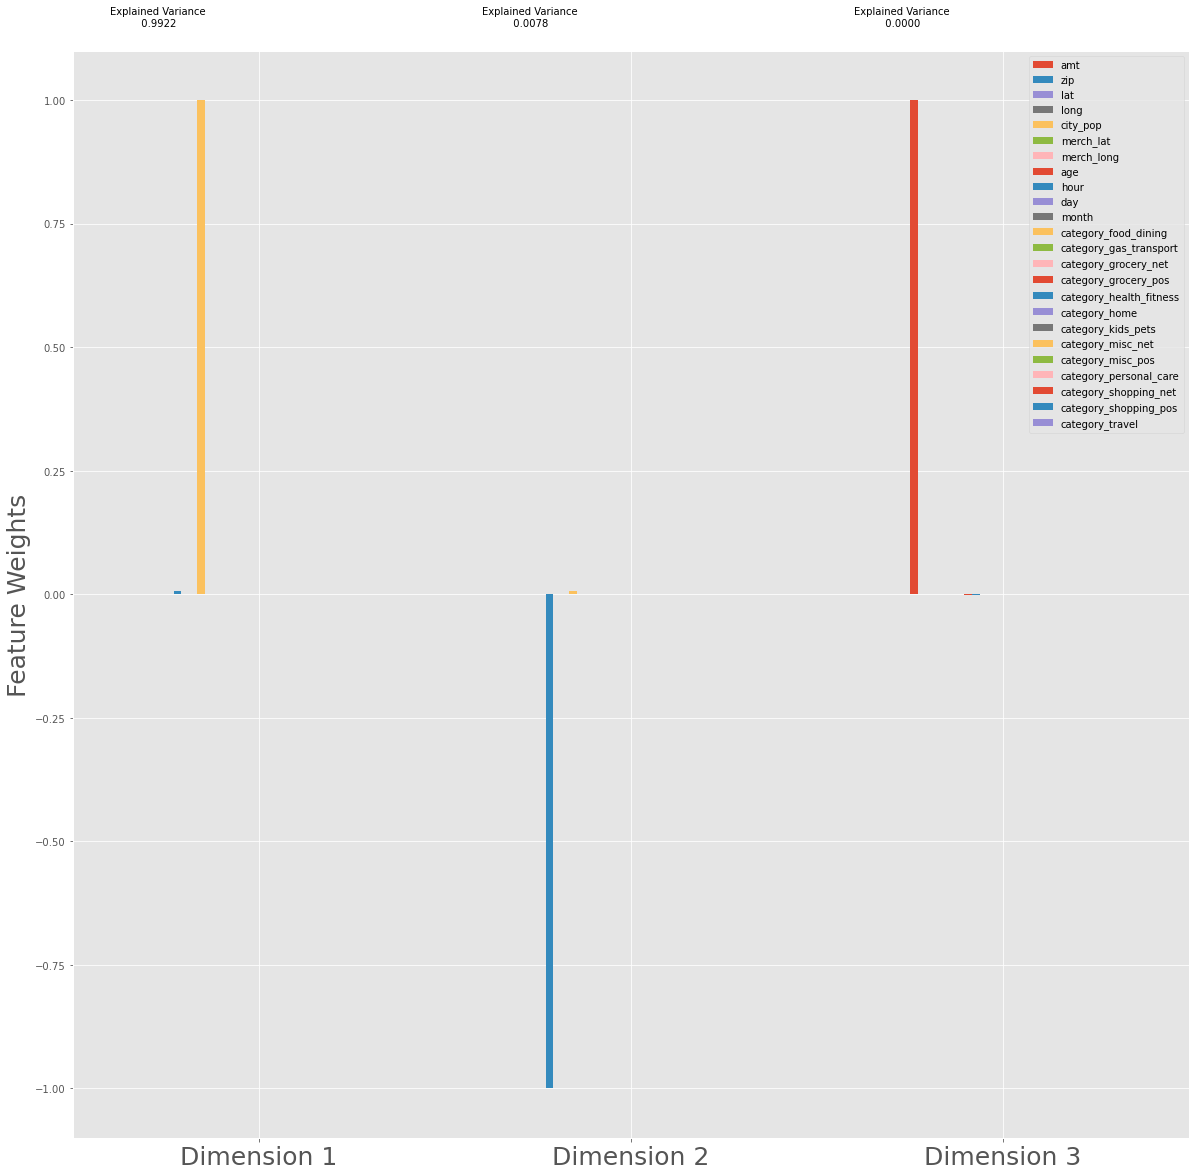

In [13]:
from sklearn.decomposition import PCA 

pca_data = X
pca = PCA(n_components=3)
pca = pca.fit(pca_data)

# Generate PCA results plot
pca_results = pca_results(pca_data, pca)

In [14]:
pd.DataFrame(data=[np.cumsum(pca.explained_variance_ratio_)], columns="Add " + 
             pca_results.index.values, index=['Combined Explained Variance'])

,Add Dimension 1,Add Dimension 2,Add Dimension 3
Combined Explained Variance,0.992209,1.0,1.0


In [15]:
pca_results.head()

,Explained Variance,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
Dimension 1,0.9922,0.0,0.0071,-0.0,-0.0000,1.0000,-0.0,-0.0000,-0.0000,0.0000,...,0.0000,-0.0,0.0,-0.0,-0.0,0.0,-0.0000,0.0,0.0,-0.0
Dimension 2,0.0078,-0.0,-1.0000,0.0,0.0005,0.0071,0.0,0.0005,-0.0000,-0.0000,...,0.0000,-0.0,0.0,-0.0,-0.0,0.0,0.0000,-0.0,0.0,0.0
Dimension 3,0.0000,1.0,-0.0000,-0.0,0.0001,-0.0000,-0.0,0.0001,-0.0008,-0.0011,...,0.0002,-0.0,-0.0,-0.0,0.0,-0.0,-0.0001,0.0,0.0,0.0


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca = pca.fit(pca_data)

reduced_data = pca.transform(pca_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])

In [17]:
reduced_data.head()

,Dimension 1,Dimension 2,Dimension 3
0,-87563.378808,-45255.416549,96.197083
1,-86653.502654,8512.379884,-22.588324
2,-80796.562355,37819.531487,-60.130184
3,-88166.512016,-15394.913020,42.467375
4,-88129.294397,-16415.675293,-13.871488


In [18]:
reduced_data.count()

Dimension 1    300000
Dimension 2    300000
Dimension 3    300000
dtype: int64

### <u>Calculating Sillhoutte Score </u>

In [19]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

score_list = []
score_columns = []
preds = {}
centers = {}
sample_preds = {}

for n in range(4,1,-1):
    print ("Calculating clusters with {} dimensions.".format(n))
    clusterer = mixture.GaussianMixture(n_components=n)
    # Future
    # clusterer = mixture.GaussianMixture(n_components=n)
    clusterer.fit(reduced_data)

    preds[n] = clusterer.predict(reduced_data)
    centers[n] = clusterer.means_
    score = silhouette_score(reduced_data, preds[n], metric='euclidean')
    score_list.append(score)
    score_columns.append(str(n) + " components")

score_list = pd.DataFrame(data=[score_list],columns=score_columns, index=['Silhouette Score'])
score_list

Calculating clusters with 4 dimensions.
Calculating clusters with 3 dimensions.
Calculating clusters with 2 dimensions.


,4 components,3 components,2 components
Silhouette Score,0.371657,0.375684,0.451344


## <b><center><u> 11.2D and 3D VISUALIZATIONS

In [20]:
def cluster_results(reduced_data, preds, centers):
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (10,5))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Set plot title
    #plt.legend(loc='upper left', numpoints=1, ncol=4, fontsize=12, bbox_to_anchor=(0, 0))
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number",
                 fontsize = 14)

In [21]:
def cluster_results_3d(reduced_data, preds, centers):
    from mpl_toolkits.mplot3d import Axes3D
    
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)
    cmap = cm.get_cmap('gist_rainbow')
    
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax2 = fig.add_subplot(111, projection='3d')

    fig = fig.gca(projection='3d')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], c[2], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200,
                   zorder=1);
        ax2.scatter(c[0], c[1], c[2], marker='$%d$'%(i), alpha = 1, s=100,
                   zorder=1);
        
    for i, cluster in plot_data.groupby('Cluster'):   
        ax2.scatter(cluster['Dimension 1'], cluster['Dimension 2'], cluster['Dimension 3'],
                   c = cmap((i)*1.0/(len(centers)-1)), alpha=0.2,
                   label = 'Cluster %i'%(i), s=20,
                   zorder=.5)

    fig.set_xlabel('Dimension 1')
    fig.set_ylabel('Dimension 2')
    fig.set_zlabel('Dimension 3')
    plt.legend(loc='upper left', numpoints=1, ncol=4, fontsize=12, bbox_to_anchor=(0, 0))
    ax2.set_title("Cluster Learning on PCA-Reduced Data 3D Plot",
                 fontsize = 14);
    plt.show()

### <u> Visualizing cluster results </u>

In [22]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

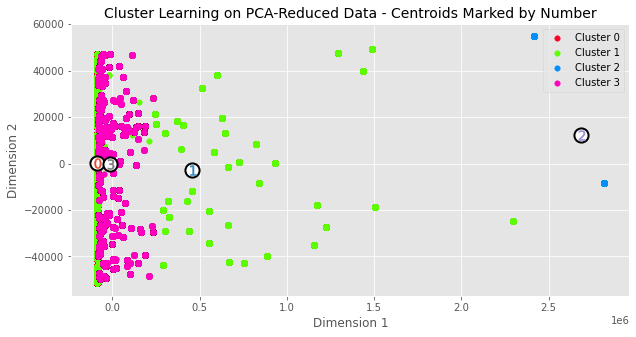

In [23]:
# with preds[n] and centers[n] where n is the number of Dimensions
no_clusters = 4
cluster_results(reduced_data, preds[no_clusters], centers[no_clusters])

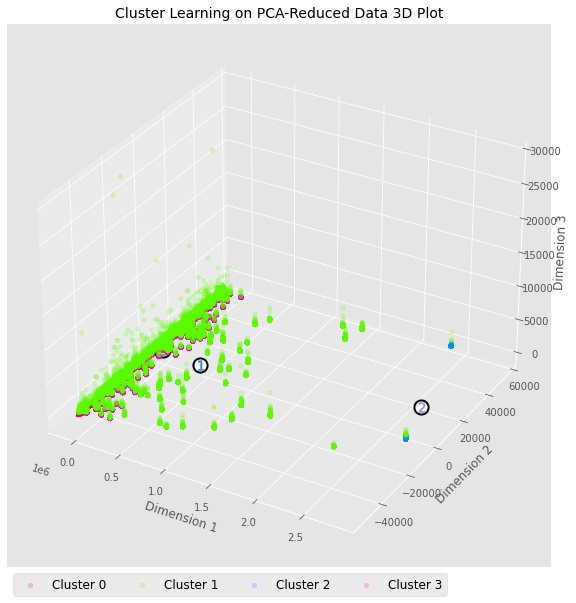

In [24]:
cluster_results_3d(reduced_data, preds[no_clusters], centers[no_clusters])

In [25]:
SemiSup_X=X
SemiSup_y=y

In [37]:
predictions = pd.DataFrame(preds[no_clusters], columns = ['Cluster'])
SemiSup_X['customer_cluster'] = predictions

In [38]:
SemiSup_X.count()

amt                        300000
zip                        300000
lat                        300000
long                       300000
city_pop                   300000
merch_lat                  300000
merch_long                 300000
age                        300000
hour                       300000
day                        300000
month                      300000
category_food_dining       300000
category_gas_transport     300000
category_grocery_net       300000
category_grocery_pos       300000
category_health_fitness    300000
category_home              300000
category_kids_pets         300000
category_misc_net          300000
category_misc_pos          300000
category_personal_care     300000
category_shopping_net      300000
category_shopping_pos      300000
category_travel            300000
customer_cluster           300000
dtype: int64

In [39]:
SemiSup_y.count()

300000

### <b><u> Checking for Imbalance in target value:

In [40]:
SemiSup_y.value_counts()

0    298444
1      1556
Name: is_fraud, dtype: int64

Since there is a huge imbalance in is_fraud , SMOTE will be used to correct the imbalance

In [41]:
from imblearn.over_sampling import SMOTE
method= SMOTE(random_state=0)
X,y= method.fit_resample(SemiSup_X, SemiSup_y)

In [42]:
y.value_counts()

0    298444
1    298444
Name: is_fraud, dtype: int64

The imbalance is now fixed, this data will be now split into train and test sets.

In [43]:
# Let's keep 20 % of the data for testing purposes
test_size = .20
random_state = 42
# Use for testing later and don't touch: X_test_base / y_test_base
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X,y, test_size = test_size, random_state = random_state)

In [44]:
X_train.shape

(477510, 25)

In [45]:
X_test.shape

(119378, 25)

In [46]:
X_train.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,customer_cluster
336081,901.05717,5121,43.428996,-72.658996,503,43.703686,-71.745641,49,22,4,...,0,0,0,0,0,0,0,0,0,1
201315,90.19000,10039,40.826500,-73.938300,1577385,40.273465,-74.312275,41,19,5,...,0,0,0,0,0,0,1,0,0,1
241948,156.96000,93552,34.571500,-118.023100,171170,34.813368,-118.643091,59,19,5,...,0,0,1,0,0,0,0,0,0,3
47915,89.72000,80736,40.769200,-103.096800,648,40.869422,-103.765600,53,12,0,...,0,0,0,0,0,0,0,0,0,0
161274,23.71000,35022,33.322400,-86.965700,71463,33.694424,-87.052184,33,12,4,...,0,0,0,0,0,0,0,0,0,3


## <CENTER><U> 8. BUILDING MODELS AND GENERATING PREDICTIONS</CENTER></U>

In [47]:
cfd_dict_base = {}
cfd_report_base = []
cfd_feature_relevance_base = []
for cfd in [LinearSVC(random_state = random_state),
            LogisticRegression(random_state = random_state),
            DecisionTreeClassifier(random_state = random_state),
            RandomForestClassifier(random_state = random_state),
            GaussianNB(),
            KNeighborsClassifier(n_neighbors = 3)]:
    # Extract name of estimator
    cfd_name = cfd.__class__.__name__
    print ("Training and Testing ", cfd_name, "...")
    # Fit model on training data
    cfd_dict_base[cfd_name] = cfd.fit(X_train, y_train)
    # Predict based on it
    # y_pred = clf.predict(X_train)
    
    # Perform cross validation
    start = time()
    X_s, y_s = shuffle(X_test, y_test)
    scores = cross_validation.cross_val_score(cfd, X_s, y_s, cv=5, scoring='accuracy')
    end = time()
    duration = end - start
    print ("Average CV performance for {}: {:.6} (in {:.6} seconds)".format(cfd_name, scores.mean(), duration))
    cfd_report_base.append([cfd_name, scores.mean(), duration])

    # Sample Store feature relevance information 
    if cfd_name in ["RandomForestClassifier", "DecisionTreeClassifier"]:
        cfd_feature_relevance_base.append(cfd.feature_importances_.tolist())
    elif cfd_name == "LinearSVC":
        cfd_feature_relevance_base.append(cfd.coef_[0].tolist())
# Store information in list for better visibility
cfd_report_base = pd.DataFrame(cfd_report_base, columns=['classifier', 'Train_accuracy', 'Train_time'])

Training and Testing  LinearSVC ...
Average CV performance for LinearSVC: 0.745764 (in 114.129 seconds)
Training and Testing  LogisticRegression ...
Average CV performance for LogisticRegression: 0.870655 (in 3.62743 seconds)
Training and Testing  DecisionTreeClassifier ...
Average CV performance for DecisionTreeClassifier: 0.983246 (in 9.66561 seconds)
Training and Testing  RandomForestClassifier ...
Average CV performance for RandomForestClassifier: 0.992813 (in 107.466 seconds)
Training and Testing  GaussianNB ...
Average CV performance for GaussianNB: 0.842408 (in 0.489584 seconds)
Training and Testing  KNeighborsClassifier ...
Average CV performance for KNeighborsClassifier: 0.967783 (in 166.129 seconds)


In [48]:
cfd_report_base

,classifier,Train_accuracy,Train_time
0,LinearSVC,0.745764,114.128689
1,LogisticRegression,0.870655,3.627432
2,DecisionTreeClassifier,0.983246,9.665615
3,RandomForestClassifier,0.992813,107.466418
4,GaussianNB,0.842408,0.489584
5,KNeighborsClassifier,0.967783,166.128751


Random Forest and decision tree appears to be overfitted Hence reducing the tree depth and passing through bagging classifier to reduce the overfitting

### <b><U> BAGGING:

#### <B>RANDOM FOREST:

In [49]:
rf = RandomForestClassifier(max_depth=10)   ## Random Forest Classifier 
bag_clf_rf = BaggingClassifier(base_estimator=rf,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [50]:
bag_clf_rf.fit(X_train, y_train)
bag_clf_rf.score(X_train,y_train),bag_clf_rf.score(X_test,y_test)     ## Score train and test data

(0.9272852924546083, 0.926368342575684)

In [51]:
y_pred1 = bag_clf_rf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1)) ## Accuracy of the prediction data 

0.926368342575684


#### DECISION TREE:

In [52]:
df = DecisionTreeClassifier(max_depth=10)   ## Random Forest Classifier
bag_clf_df = BaggingClassifier(base_estimator=df,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [53]:
bag_clf_df.fit(X_train, y_train)
bag_clf_df.score(X_train,y_train),bag_clf_df.score(X_test,y_test)     ## Score train and test data

(0.9364222738790811, 0.9356079009532745)

In [54]:
y_pred1 = bag_clf_df.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1)) ## Accuracy of the prediction data 

0.9356079009532745


## <B><U><CENTER> 9. ROC CURVE ANALYSIS - SUPERVISED MODELS

In [55]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [56]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=42), 
               DecisionTreeClassifier(max_depth=8,random_state=42),
               RandomForestClassifier(max_depth=8,random_state=42),
               LinearSVC(random_state=42),
               GaussianNB(),
               #KNeighborsClassifier(n_neighbors = 3)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    print ("Training and Testing ", cls, "...")
    clf = CalibratedClassifierCV(cls)
    model = clf.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
result_table.set_index('classifiers', inplace=True)
#print(result_table)

Training and Testing  LogisticRegression(random_state=42) ...
Training and Testing  DecisionTreeClassifier(max_depth=8, random_state=42) ...
Training and Testing  RandomForestClassifier(max_depth=8, random_state=42) ...
Training and Testing  LinearSVC(random_state=42) ...
Training and Testing  GaussianNB() ...


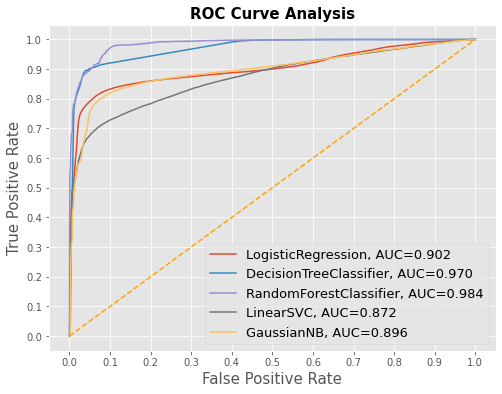

In [57]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

In [60]:
semisupervised_result=result_table.drop(result_table.columns[[0,1]], axis=1)
semisupervised_result

,auc
classifiers,
LogisticRegression,0.901737
DecisionTreeClassifier,0.969730
RandomForestClassifier,0.984112
LinearSVC,0.871891
GaussianNB,0.895900
